## Global Analysis of Mental Health and Suicide Rates 

In [93]:
import mysql.connector

In [94]:
pip install mysql-connector-python

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [95]:
#input the credentials
connection = mysql.connector.connect(
    host="127.0.0.1",  # Hostname
    user="brahul",   # Username
    password="cameroons pompon stuffiest",  # Password
    database="brahul_db"  # Database name
)

cursor = connection.cursor()

In [96]:
#Opening the cursor
cursor = connection.cursor()

#### CREATION OF ALL THE TABLES

In [20]:
#Creating the table "Countries"
cursor.execute("""
CREATE TABLE IF NOT EXISTS Countries (
Country VARCHAR(60),
Country_ID INT Primary Key
)
""")

In [5]:
#Creating the table "Facilities"
cursor.execute("""
CREATE TABLE IF NOT EXISTS Facilities (
Country_ID INT,
Year INT,
Mental_Hospitals FLOAT,
health_units FLOAT,
outpatient_facilities FLOAT,
day_treatment FLOAT,
residential_facilities FLOAT
)
""")

In [6]:
#Creating the table "SucideRates"
cursor.execute("""
CREATE TABLE IF NOT EXISTS Crude_suicide_rates (
Country_ID INT,
Sex VARCHAR(25),
80_above FLOAT,
70to79 FLOAT,
60to69 FLOAT,
50to59 FLOAT,
40to49 FLOAT,
30to39 FLOAT,
20to29 FLOAT,
10to19 FLOAT
)
""")

In [7]:
#Creating the table "HumanResources"
cursor.execute("""
CREATE TABLE IF NOT EXISTS Human_Resources (
Country_ID INT,
Year INT,
Psychiatrists FLOAT,
Nurses FLOAT,
Social_workers FLOAT,
Psychologists FLOAT
)
""")

In [8]:
#Creating the table "Age_StandardizedSuicideRates"
cursor.execute("""
CREATE TABLE IF NOT EXISTS Age_standardized_suicide_rates (
Country_ID INT,
Sex VARCHAR(60),
Year_2016 FLOAT,
Year_2015 FLOAT,
Year_2010 FLOAT,
Year_2000 FLOAT
)
""")

#### INSERTING AND POPULATING THE TABLE

In [9]:
#import csv module
import csv

In [26]:
#Loading the table "Countries" into the DB
with open('Countries.csv', 'r') as f:
    csv_reader = csv.reader(f)
    next(csv_reader)
    for row in csv_reader:
        cursor.execute("INSERT INTO  Countries (Country, Country_ID) VALUES (%s, %s)", row)

# Commit changes
connection.commit()

In [10]:
# Function to replace 'NA' with None
def handle_na_values(row):
    return [None if cell == '#N/A' else cell for cell in row]

# Loading the data into the database
with open('Facilities.csv', 'r') as f:
    csv_reader = csv.reader(f)
    next(csv_reader)  # Skip the header row if your CSV has one
    for row in csv_reader:
        row = handle_na_values(row)  # Handle 'NA' values
        try:
            cursor.execute("INSERT INTO Facilities (`Country_ID`, `Year`, `Mental_hospitals`, `health_units`, `outpatient_facilities`, `day_treatment`, `residential_facilities`) VALUES ( %s, %s, %s, %s, %s, %s, %s)", row)
        except mysql.connector.Error as e:
            print(f"An error occurred: {e}")

# Commit changes
connection.commit()


In [11]:
#Loading the table "SuicideRates" into the DB
with open('Crude_suicide_rates.csv', 'r') as f:
    csv_reader = csv.reader(f)
    next(csv_reader)
    for row in csv_reader:
        cursor.execute("INSERT INTO Crude_suicide_rates (Country_ID, Sex, 80_above, 70to79, 60to69 , 50to59 , 40to49, 30to39, 20to29, 10to19) VALUES ( %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)", row)

# Commit changes
connection.commit()

In [12]:
# FLoading the table "Human_Resources" into the DB
def handle_na_values(row):
    return [None if cell == "#N/A" else cell for cell in row]

# Loading the data into the database
with open('Human_Resources.csv', 'r') as f:
    csv_reader = csv.reader(f)
    next(csv_reader)  # Skip the header row if your CSV has one
    for row in csv_reader:
        row = handle_na_values(row)  # Handle 'NA' values
        try:
            cursor.execute("INSERT INTO Human_Resources (Country_ID, Year, Psychiatrists, Nurses, Social_workers, Psychologists) VALUES ( %s, %s, %s, %s, %s, %s)", row)        
        except mysql.connector.Error as e:
            print(f"An error occurred: {e}")

# Commit changes
connection.commit()



In [92]:
#Loading the table "Age-StandardizedSuicideRates" into the DB
with open('Age_standardized_suicide_rates.csv', 'r') as f:
    csv_reader = csv.reader(f)
    next(csv_reader)
    for row in csv_reader:
        cursor.execute("INSERT INTO Age_standardized_suicide_rates (Country_ID, Sex, Year_2016, Year_2015, Year_2010, Year_2000) VALUES ( %s, %s, %s, %s, %s, %s)", row)

# Commit changes
connection.commit()

#### GENERATING RESULTS FROM THE TABLES

In [14]:
#  top 5 countries with highest suicide rates for MALE for each age group 
cursor.execute("""
SELECT * FROM (
    (SELECT DISTINCT '80_above' AS age_group, Country_ID, 80_above AS rate
     FROM Crude_suicide_rates
     WHERE Sex = ' Male'
     ORDER BY 80_above DESC
     LIMIT 5)

    UNION ALL

    (SELECT DISTINCT '70to79', Country_ID, 70to79
     FROM Crude_suicide_rates
     WHERE Sex = ' Male'
     ORDER BY 70to79 DESC
     LIMIT 5)

    UNION ALL

    (SELECT DISTINCT '60to69', Country_ID, 60to69
     FROM Crude_suicide_rates
     WHERE Sex = ' Male'
     ORDER BY 60to69 DESC
     LIMIT 5)

    UNION ALL

    (SELECT DISTINCT '50to59', Country_ID, 50to59
     FROM Crude_suicide_rates
     WHERE Sex = ' Male'
     ORDER BY 50to59 DESC
     LIMIT 5)

    UNION ALL

    (SELECT DISTINCT '40to49', Country_ID, 40to49
     FROM Crude_suicide_rates
     WHERE Sex = ' Male'
     ORDER BY 40to49 DESC
     LIMIT 5)

    UNION ALL

    (SELECT DISTINCT '30to39', Country_ID, 30to39
     FROM Crude_suicide_rates
     WHERE Sex = ' Male'
     ORDER BY 30to39 DESC
     LIMIT 5)

    UNION ALL

    (SELECT DISTINCT '20to29', Country_ID,  20to29
     FROM Crude_suicide_rates
     WHERE Sex = ' Male'
     ORDER BY 20to29 DESC
     LIMIT 5)

    UNION ALL

    (SELECT DISTINCT '10to19', Country_ID, 10to19
     FROM Crude_suicide_rates
     WHERE Sex = ' Male'
     ORDER BY 10to19 DESC
     LIMIT 5)
    
) AS combined_results
JOIN Countries ON combined_results.Country_ID = Countries.Country_ID
ORDER BY combined_results.age_group, combined_results.rate DESC;
""")

records = cursor.fetchall()
for record in records:
    print(record)

('10to19', 1, 4.8, 'Afghanistan', 1)
('10to19', 4, 3.8, 'Angola', 4)
('10to19', 2, 3.1, 'Albania', 2)
('10to19', 3, 1.6, 'Algeria', 3)
('10to19', 5, 0.0, 'Antigua and Barbuda', 5)
('20to29', 1, 16.3, 'Afghanistan', 1)
('20to29', 4, 10.4, 'Angola', 4)
('20to29', 2, 6.3, 'Albania', 2)
('20to29', 3, 6.2, 'Algeria', 3)
('20to29', 5, 0.0, 'Antigua and Barbuda', 5)
('30to39', 1, 15.1, 'Afghanistan', 1)
('30to39', 2, 8.8, 'Albania', 2)
('30to39', 4, 8.4, 'Angola', 4)
('30to39', 3, 7.9, 'Algeria', 3)
('30to39', 5, 0.0, 'Antigua and Barbuda', 5)
('40to49', 2, 13.5, 'Albania', 2)
('40to49', 4, 10.7, 'Angola', 4)
('40to49', 1, 10.5, 'Afghanistan', 1)
('40to49', 3, 7.0, 'Algeria', 3)
('40to49', 5, 0.0, 'Antigua and Barbuda', 5)
('50to59', 4, 21.8, 'Angola', 4)
('50to59', 2, 11.4, 'Albania', 2)
('50to59', 1, 9.3, 'Afghanistan', 1)
('50to59', 3, 6.2, 'Algeria', 3)
('50to59', 5, 0.0, 'Antigua and Barbuda', 5)
('60to69', 4, 34.7, 'Angola', 4)
('60to69', 1, 9.8, 'Afghanistan', 1)
('60to69', 2, 8.1, 'Al

In [15]:
#  top 5 countries with lowest suicide rates for MALE for each age group
cursor.execute("""
SELECT * FROM (
    (SELECT DISTINCT '80_above' AS age_group, Country_ID, 80_above AS rate
     FROM Crude_suicide_rates
     WHERE Sex = ' Male' AND 80_above > 0
     ORDER BY 80_above ASC
     LIMIT 5)

    UNION ALL

    (SELECT DISTINCT '70to79', Country_ID, 70to79
     FROM Crude_suicide_rates
     WHERE Sex = ' Male' AND 70to79 > 0
     ORDER BY 70to79 ASC
     LIMIT 5)

    UNION ALL

    (SELECT DISTINCT '60to69', Country_ID, 60to69
     FROM Crude_suicide_rates
     WHERE Sex = ' Male' AND 60to69 > 0
     ORDER BY 60to69 ASC
     LIMIT 5)

    UNION ALL

    (SELECT DISTINCT '50to59', Country_ID, 50to59
     FROM Crude_suicide_rates
     WHERE Sex = ' Male' AND 50to59 > 0
     ORDER BY 50to59 ASC
     LIMIT 5)

    UNION ALL

    (SELECT DISTINCT '40to49', Country_ID, 40to49
     FROM Crude_suicide_rates
     WHERE Sex = ' Male' AND 40to49 > 0
     ORDER BY 40to49 ASC
     LIMIT 5)

    UNION ALL

    (SELECT DISTINCT '30to39', Country_ID, 30to39
     FROM Crude_suicide_rates
     WHERE Sex = ' Male' AND 30to39 > 0
     ORDER BY 30to39 ASC
     LIMIT 5)

    UNION ALL

    (SELECT DISTINCT '20to29', Country_ID, 20to29
     FROM Crude_suicide_rates
     WHERE Sex = ' Male' AND 20to29 > 0
     ORDER BY 20to29 ASC
     LIMIT 5)

    UNION ALL

    (SELECT DISTINCT '10to19', Country_ID, 10to19
     FROM Crude_suicide_rates
     WHERE Sex = ' Male' AND 10to19 > 0
     ORDER BY 10to19 ASC
     LIMIT 5)
    
) AS combined_results
JOIN Countries ON combined_results.Country_ID = Countries.Country_ID
ORDER BY combined_results.age_group, combined_results.rate ASC;

""")

records = cursor.fetchall()
for record in records:
    print(record)

('10to19', 3, 1.6, 'Algeria', 3)
('10to19', 2, 3.1, 'Albania', 2)
('10to19', 4, 3.8, 'Angola', 4)
('10to19', 1, 4.8, 'Afghanistan', 1)
('10to19', 6, 12.7, 'Argentina', 6)
('20to29', 3, 6.2, 'Algeria', 3)
('20to29', 2, 6.3, 'Albania', 2)
('20to29', 4, 10.4, 'Angola', 4)
('20to29', 1, 16.3, 'Afghanistan', 1)
('20to29', 6, 25.3, 'Argentina', 6)
('30to39', 3, 7.9, 'Algeria', 3)
('30to39', 4, 8.4, 'Angola', 4)
('30to39', 2, 8.8, 'Albania', 2)
('30to39', 1, 15.1, 'Afghanistan', 1)
('30to39', 6, 17.8, 'Argentina', 6)
('40to49', 3, 7.0, 'Algeria', 3)
('40to49', 1, 10.5, 'Afghanistan', 1)
('40to49', 4, 10.7, 'Angola', 4)
('40to49', 2, 13.5, 'Albania', 2)
('40to49', 6, 15.5, 'Argentina', 6)
('50to59', 3, 6.2, 'Algeria', 3)
('50to59', 1, 9.3, 'Afghanistan', 1)
('50to59', 2, 11.4, 'Albania', 2)
('50to59', 6, 15.1, 'Argentina', 6)
('50to59', 4, 21.8, 'Angola', 4)
('60to69', 3, 6.2, 'Algeria', 3)
('60to69', 2, 8.1, 'Albania', 2)
('60to69', 1, 9.8, 'Afghanistan', 1)
('60to69', 6, 17.2, 'Argentina', 6

In [16]:
#  top 5 countries with highest suicide rates for Female for each age group
cursor.execute("""
SELECT * FROM (
    (SELECT DISTINCT '80_above' AS age_group, Country_ID, 80_above AS rate
     FROM Crude_suicide_rates
     WHERE Sex = ' Female'
     ORDER BY 80_above DESC
     LIMIT 5)

    UNION ALL

    (SELECT DISTINCT '70to79', Country_ID, 70to79
     FROM Crude_suicide_rates
     WHERE Sex = ' Female'
     ORDER BY 70to79 DESC
     LIMIT 5)

    UNION ALL

    (SELECT DISTINCT '60to69', Country_ID, 60to69
     FROM Crude_suicide_rates
     WHERE Sex = ' Female'
     ORDER BY 60to69 DESC
     LIMIT 5)

    UNION ALL

    (SELECT DISTINCT '50to59', Country_ID, 50to59
     FROM Crude_suicide_rates
     WHERE Sex = ' Female'
     ORDER BY 50to59 DESC
     LIMIT 5)

    UNION ALL

    (SELECT DISTINCT '40to49', Country_ID, 40to49
     FROM Crude_suicide_rates
     WHERE Sex = ' Female'
     ORDER BY 40to49 DESC
     LIMIT 5)

    UNION ALL

    (SELECT DISTINCT '30to39', Country_ID, 30to39
     FROM Crude_suicide_rates
     WHERE Sex = ' Female'
     ORDER BY 30to39 DESC
     LIMIT 5)

    UNION ALL

    (SELECT DISTINCT '20to29', Country_ID, 20to29
     FROM Crude_suicide_rates
     WHERE Sex = ' Female'
     ORDER BY 20to29 DESC
     LIMIT 5)

    UNION ALL

    (SELECT DISTINCT '10to19', Country_ID, 10to19
     FROM Crude_suicide_rates
     WHERE Sex = ' Female'
     ORDER BY 10to19 DESC
     LIMIT 5)
    
) AS combined_results
JOIN Countries ON combined_results.Country_ID = Countries.Country_ID
ORDER BY combined_results.age_group, combined_results.rate DESC;

""")

records = cursor.fetchall()
for record in records:
    print(record)

('10to19', 2, 7.0, 'Albania', 2)
('10to19', 4, 1.4, 'Angola', 4)
('10to19', 1, 1.2, 'Afghanistan', 1)
('10to19', 3, 1.0, 'Algeria', 3)
('10to19', 5, 0.0, 'Antigua and Barbuda', 5)
('20to29', 2, 6.6, 'Albania', 2)
('20to29', 1, 3.5, 'Afghanistan', 1)
('20to29', 4, 2.9, 'Angola', 4)
('20to29', 3, 2.1, 'Algeria', 3)
('20to29', 5, 0.0, 'Antigua and Barbuda', 5)
('30to39', 2, 3.4, 'Albania', 2)
('30to39', 1, 2.7, 'Afghanistan', 1)
('30to39', 3, 2.6, 'Algeria', 3)
('30to39', 4, 2.5, 'Angola', 4)
('30to39', 5, 0.0, 'Antigua and Barbuda', 5)
('40to49', 2, 5.0, 'Albania', 2)
('40to49', 4, 3.5, 'Angola', 4)
('40to49', 3, 2.4, 'Algeria', 3)
('40to49', 1, 2.3, 'Afghanistan', 1)
('40to49', 5, 0.0, 'Antigua and Barbuda', 5)
('50to59', 4, 8.6, 'Angola', 4)
('50to59', 2, 4.4, 'Albania', 2)
('50to59', 3, 2.0, 'Algeria', 3)
('50to59', 1, 1.6, 'Afghanistan', 1)
('50to59', 5, 0.0, 'Antigua and Barbuda', 5)
('60to69', 5, 15.8, 'Antigua and Barbuda', 5)
('60to69', 4, 14.5, 'Angola', 4)
('60to69', 2, 3.9, 'A

In [17]:
#  top 5 countries with lowest suicide rates for Female  for each age group
cursor.execute("""
SELECT * FROM (
    (SELECT DISTINCT '80_above' AS age_group, Country_ID, 80_above AS rate
     FROM Crude_suicide_rates
     WHERE Sex = ' Female' AND 80_above > 0
     ORDER BY 80_above ASC
     LIMIT 5)

    UNION ALL

    (SELECT DISTINCT '70to79', Country_ID, 70to79
     FROM Crude_suicide_rates
     WHERE Sex = ' Female' AND 70to79 > 0
     ORDER BY 70to79 ASC
     LIMIT 5)

    UNION ALL

    (SELECT DISTINCT '60to69', Country_ID, 60to69
     FROM Crude_suicide_rates
     WHERE Sex = ' Female' AND 60to69 > 0
     ORDER BY 60to69 ASC
     LIMIT 5)

    UNION ALL

    (SELECT DISTINCT '50to59', Country_ID, 50to59
     FROM Crude_suicide_rates
     WHERE Sex = ' Female' AND 50to59 > 0
     ORDER BY 50to59 ASC
     LIMIT 5)

    UNION ALL

    (SELECT DISTINCT '40to49', Country_ID, 40to49
     FROM Crude_suicide_rates
     WHERE Sex = ' Female' AND 40to49 > 0
     ORDER BY 40to49 ASC
     LIMIT 5)

    UNION ALL

    (SELECT DISTINCT '30to39', Country_ID, 30to39
     FROM Crude_suicide_rates
     WHERE Sex = ' Female' AND 30to39 > 0
     ORDER BY 30to39 ASC
     LIMIT 5)

    UNION ALL

    (SELECT DISTINCT '20to29', Country_ID, 20to29
     FROM Crude_suicide_rates
     WHERE Sex = ' Female' AND 20to29 > 0
     ORDER BY 20to29 ASC
     LIMIT 5)

    UNION ALL

    (SELECT DISTINCT '10to19', Country_ID, 10to19
     FROM Crude_suicide_rates
     WHERE Sex = ' Female' AND 10to19 > 0
     ORDER BY 10to19 ASC
     LIMIT 5)
    
) AS combined_results
JOIN Countries ON combined_results.Country_ID = Countries.Country_ID
ORDER BY combined_results.age_group, combined_results.rate ASC;

""")

records = cursor.fetchall()
for record in records:
    print(record)

('10to19', 3, 1.0, 'Algeria', 3)
('10to19', 1, 1.2, 'Afghanistan', 1)
('10to19', 4, 1.4, 'Angola', 4)
('10to19', 6, 4.3, 'Argentina', 6)
('10to19', 2, 7.0, 'Albania', 2)
('20to29', 3, 2.1, 'Algeria', 3)
('20to29', 4, 2.9, 'Angola', 4)
('20to29', 1, 3.5, 'Afghanistan', 1)
('20to29', 6, 5.0, 'Argentina', 6)
('20to29', 2, 6.6, 'Albania', 2)
('30to39', 4, 2.5, 'Angola', 4)
('30to39', 3, 2.6, 'Algeria', 3)
('30to39', 1, 2.7, 'Afghanistan', 1)
('30to39', 2, 3.4, 'Albania', 2)
('30to39', 6, 3.7, 'Argentina', 6)
('40to49', 1, 2.3, 'Afghanistan', 1)
('40to49', 3, 2.4, 'Algeria', 3)
('40to49', 4, 3.5, 'Angola', 4)
('40to49', 6, 4.2, 'Argentina', 6)
('40to49', 2, 5.0, 'Albania', 2)
('50to59', 1, 1.6, 'Afghanistan', 1)
('50to59', 3, 2.0, 'Algeria', 3)
('50to59', 6, 4.3, 'Argentina', 6)
('50to59', 2, 4.4, 'Albania', 2)
('50to59', 4, 8.6, 'Angola', 4)
('60to69', 1, 1.4, 'Afghanistan', 1)
('60to69', 3, 2.2, 'Algeria', 3)
('60to69', 2, 3.9, 'Albania', 2)
('60to69', 4, 14.5, 'Angola', 4)
('60to69', 5, 

In [47]:
#  top 5 countries with highest suicide rates across the 2 decades

cursor.execute("""
SELECT * FROM (
    (SELECT DISTINCT '2016' AS Year, Country_ID, Year_2016 AS rate, ' Male' AS sex
     FROM Age_standardized_suicide_rates
     WHERE Sex = ' Male'
     ORDER BY Year_2016 DESC
     LIMIT 5)
    UNION ALL
    (SELECT DISTINCT'2016', Country_ID, Year_2016, ' Female'
     FROM Age_standardized_suicide_rates
     WHERE Sex = ' Female'
     ORDER BY Year_2016 DESC
     LIMIT 5)

    UNION ALL

    (SELECT DISTINCT '2015' AS Year, Country_ID, Year_2015 AS rate, ' Male'
     FROM Age_standardized_suicide_rates
     WHERE Sex = ' Male'
     ORDER BY Year_2015 DESC
     LIMIT 5)
    UNION ALL
    (SELECT DISTINCT '2015', Country_ID, Year_2015, ' Female'
     FROM Age_standardized_suicide_rates
     WHERE Sex = ' Female'
     ORDER BY Year_2015 DESC
     LIMIT 5)

    UNION ALL

    (SELECT DISTINCT '2010' AS Year, Country_ID, Year_2010 AS rate, ' Male'
     FROM Age_standardized_suicide_rates
     WHERE Sex = ' Male'
     ORDER BY Year_2010 DESC
     LIMIT 5)
    UNION ALL
    (SELECT DISTINCT '2010', Country_ID, Year_2010, ' Female'
     FROM Age_standardized_suicide_rates
     WHERE Sex = ' Female'
     ORDER BY Year_2010 DESC
     LIMIT 5)

    UNION ALL

    (SELECT DISTINCT '2000' AS Year, Country_ID, Year_2000 AS rate, ' Male'
     FROM Age_standardized_suicide_rates
     WHERE Sex = ' Male'
     ORDER BY Year_2000 DESC
     LIMIT 5)
    UNION ALL
    (SELECT DISTINCT'2000', Country_ID, Year_2000, ' Female'
     FROM Age_standardized_suicide_rates
     WHERE Sex = ' Female'
     ORDER BY Year_2000 DESC
     LIMIT 5)
) AS combined_results
JOIN Countries ON combined_results.Country_ID = Countries.Country_ID
ORDER BY Year, sex, rate ASC;
""")

records = cursor.fetchall()
for record in records:
    print(record)

('2000', 146, 16.6, ' Female', 'Sierra Leone', 146)
('2000', 137, 19.4, ' Female', 'Rwanda', 137)
('2000', 120, 20.6, ' Female', 'Nigeria', 120)
('2000', 170, 23.9, ' Female', 'Uganda', 170)
('2000', 94, 30.2, ' Female', 'Lesotho', 94)
('2000', 171, 58.1, ' Male', 'Ukraine', 171)
('2000', 86, 63.1, ' Male', 'Kazakhstan', 86)
('2000', 15, 70.4, ' Male', 'Belarus', 15)
('2000', 97, 81.7, ' Male', 'Lithuania', 97)
('2000', 136, 85.8, ' Male', 'Russian Federation', 136)
('2010', 33, 15.9, ' Female', 'Chad', 33)
('2010', 132, 18.7, ' Female', 'Republic of Korea', 132)
('2010', 120, 20.1, ' Female', 'Nigeria', 120)
('2010', 170, 22.0, ' Female', 'Uganda', 170)
('2010', 94, 31.0, ' Female', 'Lesotho', 94)
('2010', 71, 44.9, ' Male', 'Guyana', 71)
('2010', 86, 56.1, ' Male', 'Kazakhstan', 86)
('2010', 97, 56.4, ' Male', 'Lithuania', 97)
('2010', 15, 58.1, ' Male', 'Belarus', 15)
('2010', 136, 62.3, ' Male', 'Russian Federation', 136)
('2015', 71, 14.3, ' Female', 'Guyana', 71)
('2015', 76, 14.

In [19]:
#  top 5 countries with lowest suicide rates across the two decades

cursor.execute("""
SELECT combined_results.Year, Countries.Country, combined_results.rate, combined_results.sex
FROM (
    (SELECT DISTINCT '2016' AS Year, Country_ID, Year_2016 AS rate, ' Male' AS sex
     FROM Age_standardized_suicide_rates
     WHERE Sex = ' Male'
     ORDER BY Year_2016 DESC
     LIMIT 5)
    UNION ALL
    (SELECT DISTINCT'2016', Country_ID, Year_2016, ' Female'
     FROM Age_standardized_suicide_rates
     WHERE Sex = ' Female'
     ORDER BY Year_2016 DESC
     LIMIT 5)

    UNION ALL

    (SELECT DISTINCT '2015' AS Year, Country_ID, Year_2015 AS rate, ' Male'
     FROM Age_standardized_suicide_rates
     WHERE Sex = ' Male'
     ORDER BY Year_2015 DESC
     LIMIT 5)
    UNION ALL
    (SELECT DISTINCT '2015', Country_ID, Year_2015, ' Female'
     FROM Age_standardized_suicide_rates
     WHERE Sex = ' Female'
     ORDER BY Year_2015 DESC
     LIMIT 5)

    UNION ALL

    (SELECT DISTINCT '2010' AS Year, Country_ID, Year_2010 AS rate, ' Male'
     FROM Age_standardized_suicide_rates
     WHERE Sex = ' Male'
     ORDER BY Year_2010 DESC
     LIMIT 5)
    UNION ALL
    (SELECT DISTINCT '2010', Country_ID, Year_2010, ' Female'
     FROM Age_standardized_suicide_rates
     WHERE Sex = ' Female'
     ORDER BY Year_2010 DESC
     LIMIT 5)

    UNION ALL

    (SELECT DISTINCT '2000' AS Year, Country_ID, Year_2000 AS rate, ' Male'
     FROM Age_standardized_suicide_rates
     WHERE Sex = ' Male'
     ORDER BY Year_2000 DESC
     LIMIT 5)
    UNION ALL
    (SELECT DISTINCT'2000', Country_ID, Year_2000, ' Female'
     FROM Age_standardized_suicide_rates
     WHERE Sex = ' Female'
     ORDER BY Year_2000 DESC
     LIMIT 5)
) AS combined_results
JOIN Countries ON combined_results.Country_ID = Countries.Country_ID
ORDER BY Year, sex, rate DESC;

""")

records = cursor.fetchall()
for record in records:
    print(record)

('2000', 'Lesotho', 30.2, ' Female')
('2000', 'Uganda', 23.9, ' Female')
('2000', 'Nigeria', 20.6, ' Female')
('2000', 'Rwanda', 19.4, ' Female')
('2000', 'Sierra Leone', 16.6, ' Female')
('2000', 'Russian Federation', 85.8, ' Male')
('2000', 'Lithuania', 81.7, ' Male')
('2000', 'Belarus', 70.4, ' Male')
('2000', 'Kazakhstan', 63.1, ' Male')
('2000', 'Ukraine', 58.1, ' Male')
('2010', 'Lesotho', 31.0, ' Female')
('2010', 'Uganda', 22.0, ' Female')
('2010', 'Nigeria', 20.1, ' Female')
('2010', 'Republic of Korea', 18.7, ' Female')
('2010', 'Chad', 15.9, ' Female')
('2010', 'Russian Federation', 62.3, ' Male')
('2010', 'Belarus', 58.1, ' Male')
('2010', 'Lithuania', 56.4, ' Male')
('2010', 'Kazakhstan', 56.1, ' Male')
('2010', 'Guyana', 44.9, ' Male')
('2015', 'Lesotho', 32.1, ' Female')
('2015', 'Uganda', 19.2, ' Female')
('2015', 'Nigeria', 17.6, ' Female')
('2015', 'India', 14.7, ' Female')
('2015', 'Guyana', 14.3, ' Female')
('2015', 'Lithuania', 51.5, ' Male')
('2015', 'Russian Fede

#### HUMAN RESOURCE ANALYSIS

In [20]:
#TOP 5 countries in  Psychiatrists
cursor.execute("""
SELECT Countries.Country, Human_Resources.Psychiatrists
FROM Human_Resources
JOIN Countries ON Human_Resources.Country_ID = Countries.Country_ID
ORDER BY Human_Resources.Psychiatrists DESC
LIMIT 5;
""")

records = cursor.fetchall()
for record in records:
    print(record)

('Norway', 48.04)
('New Zealand', 28.54)
('Poland', 24.176)
('Argentina', 21.705)
('Sweden', 20.863)


In [24]:
#TOP 5 countries in  NURSES
cursor.execute("""
SELECT Countries.Country, Human_Resources.Nurses
FROM Human_Resources
JOIN Countries ON Human_Resources.Country_ID = Countries.Country_ID
ORDER BY Human_Resources.Nurses DESC
LIMIT 5;
""")

records = cursor.fetchall()
for record in records:
    print(record)

('Turkey', 150.251)
('Japan', 83.805)
('New Zealand', 75.132)
('Saint Lucia', 50.788)
('Sweden', 50.566)


In [26]:
#TOP 5 countries in   Social Workers
cursor.execute("""
SELECT Countries.Country, Human_Resources.Social_Workers
FROM Human_Resources
JOIN Countries ON Human_Resources.Country_ID = Countries.Country_ID
ORDER BY Human_Resources.Social_Workers DESC
LIMIT 5;
""")



records = cursor.fetchall()
for record in records:
    print(record)

('Costa Rica', 76.957)
('United States of America', 60.338)
('Panama', 9.221)
('Republic of Korea', 8.404)
('Japan', 8.328)


In [27]:
#TOP 5 countries in  Psychologists
cursor.execute("""
SELECT Countries.Country, Human_Resources.Psychologists
FROM Human_Resources
JOIN Countries ON Human_Resources.Country_ID = Countries.Country_ID
ORDER BY Human_Resources.Psychologists DESC
LIMIT 5;
""")

records = cursor.fetchall()
for record in records:
    print(record)

('Argentina', 222.572)
('Costa Rica', 142.018)
('Israel', 88.089)
('Norway', 73.522)
('Guatemala', 46.147)


In [75]:
## How Does Having more Human Resources For a Country Impact the Suicide Rates Average ###
#For Psychiatrists
cursor.execute("""
SELECT 
    Countries.Country, 
    Crude_suicide_rates.Sex,
    Crude_suicide_rates.80_above,
    Crude_suicide_rates.70to79,
    Crude_suicide_rates.60to69,
    Crude_suicide_rates.50to59,
    Crude_suicide_rates.40to49,
    Crude_suicide_rates.30to39,
    Crude_suicide_rates.20to29,
    Crude_suicide_rates.10to19
FROM 
    Crude_suicide_rates
JOIN 
    Countries ON Crude_suicide_rates.Country_ID = Countries.Country_ID
WHERE 
    Countries.Country IN ('Norway', 'New Zealand', 'Poland', 'Argentina', 'Sweden')
AND
    Crude_suicide_rates.Sex NOT IN (' Both Sexes');
""")

records = cursor.fetchall()
for record in records:
    print(record)



('Argentina', ' Male', 41.6, 22.7, 17.2, 15.1, 15.5, 17.8, 25.3, 12.7)
('Argentina', ' Female', 4.1, 3.7, 3.9, 4.3, 4.2, 3.7, 5.0, 4.3)
('New Zealand', ' Male', 24.4, 16.5, 12.7, 20.8, 27.3, 21.6, 27.1, 14.2)
('New Zealand', ' Female', 19.7, 2.2, 3.8, 8.9, 6.5, 7.5, 8.7, 8.1)
('Norway', ' Male', 37.1, 17.4, 20.9, 22.8, 20.2, 18.7, 17.0, 3.9)
('Norway', ' Female', 29.1, 7.9, 11.7, 12.1, 9.6, 7.1, 7.1, 2.2)
('Poland', ' Male', 35.8, 33.3, 40.1, 49.4, 35.5, 27.9, 28.2, 8.4)
('Poland', ' Female', 5.1, 4.7, 6.3, 7.2, 6.0, 3.2, 2.6, 2.2)
('Sweden', ' Male', 47.0, 26.1, 23.5, 26.2, 23.3, 21.8, 18.2, 4.5)
('Sweden', ' Female', 44.2, 11.2, 11.1, 14.1, 9.7, 8.1, 8.6, 2.4)


In [77]:
#For Nurses
cursor.execute("""
SELECT 
    Countries.Country, 
    Crude_suicide_rates.Sex,
    Crude_suicide_rates.80_above,
    Crude_suicide_rates.70to79,
    Crude_suicide_rates.60to69,
    Crude_suicide_rates.50to59,
    Crude_suicide_rates.40to49,
    Crude_suicide_rates.30to39,
    Crude_suicide_rates.20to29,
    Crude_suicide_rates.10to19
FROM 
    Crude_suicide_rates
JOIN 
    Countries ON Crude_suicide_rates.Country_ID = Countries.Country_ID
WHERE 
    Countries.Country IN ('Turkey','Japan','New Zealand','Saint Lucia','Sweden')
AND
    Crude_suicide_rates.Sex NOT IN (' Both Sexes');
""")

records = cursor.fetchall()
for record in records:
    print(record)

('Japan', ' Male', 42.6, 35.5, 28.9, 34.5, 29.8, 26.8, 27.1, 6.6)
('Japan', ' Female', 19.7, 17.5, 12.9, 13.1, 11.3, 10.0, 9.6, 3.0)
('New Zealand', ' Male', 24.4, 16.5, 12.7, 20.8, 27.3, 21.6, 27.1, 14.2)
('New Zealand', ' Female', 19.7, 2.2, 3.8, 8.9, 6.5, 7.5, 8.7, 8.1)
('Saint Lucia', ' Male', 18.0, 20.8, 25.4, 19.2, 18.7, 13.4, 15.4, 6.3)
('Saint Lucia', ' Female', 0.0, 0.0, 0.0, 0.0, 7.1, 2.7, 2.5, 2.5)
('Sweden', ' Male', 47.0, 26.1, 23.5, 26.2, 23.3, 21.8, 18.2, 4.5)
('Sweden', ' Female', 44.2, 11.2, 11.1, 14.1, 9.7, 8.1, 8.6, 2.4)
('Turkey', ' Male', 18.5, 9.8, 4.9, 4.9, 11.3, 22.7, 24.3, 6.5)
('Turkey', ' Female', 5.4, 2.3, 1.5, 1.4, 2.4, 4.9, 6.8, 4.2)


In [80]:
#For Social Workers
cursor.execute("""
SELECT 
    Countries.Country, 
    Crude_suicide_rates.Sex,
    Crude_suicide_rates.80_above,
    Crude_suicide_rates.70to79,
    Crude_suicide_rates.60to69,
    Crude_suicide_rates.50to59,
    Crude_suicide_rates.40to49,
    Crude_suicide_rates.30to39,
    Crude_suicide_rates.20to29,
    Crude_suicide_rates.10to19
FROM 
    Crude_suicide_rates
JOIN 
    Countries ON Crude_suicide_rates.Country_ID = Countries.Country_ID
WHERE 
    Countries.Country IN ('Costa Rica','United States of America','Panama', 'Republic of Korea','Japan')
AND
    Crude_suicide_rates.Sex NOT IN (' Both Sexes');
""")

records = cursor.fetchall()
for record in records:
    print(record)

('Costa Rica', ' Male', 14.5, 17.4, 15.6, 20.0, 18.0, 17.2, 18.5, 6.5)
('Costa Rica', ' Female', 5.7, 0.9, 1.3, 3.4, 2.9, 2.8, 3.3, 2.3)
('Japan', ' Male', 42.6, 35.5, 28.9, 34.5, 29.8, 26.8, 27.1, 6.6)
('Japan', ' Female', 19.7, 17.5, 12.9, 13.1, 11.3, 10.0, 9.6, 3.0)
('Panama', ' Male', 15.7, 13.5, 8.1, 8.7, 8.7, 10.3, 11.9, 5.5)
('Panama', ' Female', 4.5, 1.2, 0.6, 1.8, 1.1, 1.4, 1.6, 1.4)
('Republic of Korea', ' Male', 155.0, 104.4, 54.2, 56.8, 44.1, 33.9, 16.9, 4.9)
('Republic of Korea', ' Female', 51.5, 33.4, 15.5, 14.6, 16.5, 17.6, 11.1, 3.9)
('United States of America', ' Male', 49.7, 32.5, 27.9, 32.0, 28.5, 29.4, 28.9, 9.0)
('United States of America', ' Female', 9.6, 6.6, 8.8, 11.6, 10.1, 9.0, 6.6, 3.4)


In [81]:
#For Psychologists
cursor.execute("""
SELECT 
    Countries.Country, 
    Crude_suicide_rates.Sex,
    Crude_suicide_rates.80_above,
    Crude_suicide_rates.70to79,
    Crude_suicide_rates.60to69,
    Crude_suicide_rates.50to59,
    Crude_suicide_rates.40to49,
    Crude_suicide_rates.30to39,
    Crude_suicide_rates.20to29,
    Crude_suicide_rates.10to19
FROM 
    Crude_suicide_rates
JOIN 
    Countries ON Crude_suicide_rates.Country_ID = Countries.Country_ID
WHERE 
    Countries.Country IN ('Argentina','Costa Rica','Israel','Norway','Guatemala')
AND
    Crude_suicide_rates.Sex NOT IN (' Both Sexes');
""")

records = cursor.fetchall()
for record in records:
    print(record)

('Argentina', ' Male', 41.6, 22.7, 17.2, 15.1, 15.5, 17.8, 25.3, 12.7)
('Argentina', ' Female', 4.1, 3.7, 3.9, 4.3, 4.2, 3.7, 5.0, 4.3)
('Costa Rica', ' Male', 14.5, 17.4, 15.6, 20.0, 18.0, 17.2, 18.5, 6.5)
('Costa Rica', ' Female', 5.7, 0.9, 1.3, 3.4, 2.9, 2.8, 3.3, 2.3)
('Guatemala', ' Male', 6.6, 5.3, 7.8, 5.6, 6.5, 5.1, 5.9, 2.6)
('Guatemala', ' Female', 8.0, 0.8, 1.1, 1.0, 0.9, 1.5, 2.6, 3.6)
('Israel', ' Male', 27.5, 13.6, 12.2, 15.0, 14.3, 8.2, 9.7, 2.1)
('Israel', ' Female', 13.5, 6.6, 4.0, 4.1, 2.7, 3.1, 2.0, 0.7)
('Norway', ' Male', 37.1, 17.4, 20.9, 22.8, 20.2, 18.7, 17.0, 3.9)
('Norway', ' Female', 29.1, 7.9, 11.7, 12.1, 9.6, 7.1, 7.1, 2.2)


#### FACILITIES

In [29]:
#TOP 5 countries in  Mental_hospitals
cursor.execute("""
SELECT DISTINCT Country,  Mental_hospitals
FROM Facilities
JOIN Countries ON Facilities.Country_ID = Countries.Country_ID
ORDER BY Mental_hospitals DESC
LIMIT 5;
""")

records = cursor.fetchall()
for record in records:
    print(record)

('Japan', 8.314)
('Colombia', 1.988)
('Seychelles', 1.067)
('Antigua and Barbuda', 1.001)
('Argentina', 0.937)


In [30]:
#TOP 5 countries in  health_units
cursor.execute("""
SELECT DISTINCT Country,  health_units
FROM Facilities
JOIN Countries ON Facilities.Country_ID = Countries.Country_ID
ORDER BY health_units DESC
LIMIT 5;
""")

records = cursor.fetchall()
for record in records:
    print(record)

('Iceland', 4.542)
('Hungary', 2.647)
('Belize', 1.948)
('Ghana', 1.095)
('Argentina', 1.071)


In [31]:
#TOP 5 countries in  outpatient_facilities
cursor.execute("""
SELECT DISTINCT Country,  outpatient_facilities
FROM Facilities
JOIN Countries ON Facilities.Country_ID = Countries.Country_ID
ORDER BY outpatient_facilities DESC
LIMIT 5;
""")

records = cursor.fetchall()
for record in records:
    print(record)

('Saint Lucia', 19.751)
('Estonia', 14.82)
('Samoa', 12.387)
('Grenada', 10.297)
('Hungary', 8.269)


In [32]:
#TOP 5 countries in  day_treatment
cursor.execute("""
SELECT DISTINCT Country,  day_treatment
FROM Facilities
JOIN Countries ON Facilities.Country_ID = Countries.Country_ID
ORDER BY day_treatment DESC
LIMIT 5;
""")

records = cursor.fetchall()
for record in records:
    print(record)

('Estonia', 17.176)
('Bulgaria', 5.935)
('Japan', 3.759)
('Malaysia', 3.118)
('Ecuador', 3.01)


In [82]:
#TOP 5 countries in  residential_facilities
cursor.execute("""
SELECT DISTINCT Country,  residential_facilities
FROM Facilities
JOIN Countries ON Facilities.Country_ID = Countries.Country_ID
ORDER BY residential_facilities DESC
LIMIT 5;
""")

records = cursor.fetchall()
for record in records:
    print(record)

('Greece', 6.178)
('Samoa', 4.645)
('Ireland', 4.468)
('Slovenia', 3.518)
('Estonia', 3.496)


In [84]:
## How Does Having more Facilities For a Country Impact the Suicide Rates GLobally###
#For Mental Hospitals
cursor.execute("""
SELECT 
    Countries.Country, 
    Crude_suicide_rates.Sex,
    Crude_suicide_rates.80_above,
    Crude_suicide_rates.70to79,
    Crude_suicide_rates.60to69,
    Crude_suicide_rates.50to59,
    Crude_suicide_rates.40to49,
    Crude_suicide_rates.30to39,
    Crude_suicide_rates.20to29,
    Crude_suicide_rates.10to19
FROM 
    Crude_suicide_rates
JOIN 
    Countries ON Crude_suicide_rates.Country_ID = Countries.Country_ID
WHERE 
    Countries.Country IN ('Japan','Colombia','Seychelles','Antigua and Barbuda','Argentina')
AND
    Crude_suicide_rates.Sex NOT IN (' Both Sexes');
""")

records = cursor.fetchall()
for record in records:
    print(record)

('Antigua and Barbuda', ' Male', 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)
('Antigua and Barbuda', ' Female', 0.0, 0.0, 15.8, 0.0, 0.0, 0.0, 0.0, 0.0)
('Argentina', ' Male', 41.6, 22.7, 17.2, 15.1, 15.5, 17.8, 25.3, 12.7)
('Argentina', ' Female', 4.1, 3.7, 3.9, 4.3, 4.2, 3.7, 5.0, 4.3)
('Colombia', ' Male', 22.9, 20.6, 16.2, 13.9, 11.9, 13.0, 17.9, 9.6)
('Colombia', ' Female', 1.8, 1.9, 2.3, 2.7, 2.3, 2.8, 4.4, 5.0)
('Japan', ' Male', 42.6, 35.5, 28.9, 34.5, 29.8, 26.8, 27.1, 6.6)
('Japan', ' Female', 19.7, 17.5, 12.9, 13.1, 11.3, 10.0, 9.6, 3.0)
('Seychelles', ' Male', 47.8, 35.2, 30.4, 27.0, 25.0, 16.9, 13.9, 2.1)
('Seychelles', ' Female', 14.3, 5.9, 3.5, 2.9, 3.1, 2.1, 1.7, 0.9)


In [86]:
#For health_units
cursor.execute("""
SELECT 
    Countries.Country, 
    Crude_suicide_rates.Sex,
    Crude_suicide_rates.80_above,
    Crude_suicide_rates.70to79,
    Crude_suicide_rates.60to69,
    Crude_suicide_rates.50to59,
    Crude_suicide_rates.40to49,
    Crude_suicide_rates.30to39,
    Crude_suicide_rates.20to29,
    Crude_suicide_rates.10to19
FROM 
    Crude_suicide_rates
JOIN 
    Countries ON Crude_suicide_rates.Country_ID = Countries.Country_ID
WHERE 
    Countries.Country IN ('Iceland','Hungary','Belize','Ghana','Argentina')
AND
    Crude_suicide_rates.Sex NOT IN (' Both Sexes');
""")

records = cursor.fetchall()
for record in records:
    print(record)

('Argentina', ' Male', 41.6, 22.7, 17.2, 15.1, 15.5, 17.8, 25.3, 12.7)
('Argentina', ' Female', 4.1, 3.7, 3.9, 4.3, 4.2, 3.7, 5.0, 4.3)
('Belize', ' Male', 36.2, 29.0, 25.9, 17.8, 12.8, 7.6, 9.0, 3.5)
('Belize', ' Female', 10.4, 7.0, 4.1, 3.0, 1.9, 0.6, 1.8, 2.0)
('Ghana', ' Male', 165.0, 88.5, 42.7, 22.4, 13.2, 9.9, 7.6, 2.3)
('Ghana', ' Female', 15.7, 12.0, 6.6, 3.4, 2.2, 2.5, 3.0, 1.4)
('Hungary', ' Male', 99.3, 67.5, 48.3, 47.5, 32.7, 21.2, 14.1, 4.1)
('Hungary', ' Female', 25.9, 19.0, 12.2, 14.2, 9.8, 6.0, 3.5, 1.3)
('Iceland', ' Male', 0.0, 12.2, 37.4, 17.7, 38.2, 30.5, 25.1, 21.2)
('Iceland', ' Female', 13.7, 5.1, 10.3, 9.3, 2.4, 11.6, 4.2, 0.0)


In [88]:
#For outpatient_facilities
cursor.execute("""
SELECT 
    Countries.Country, 
    Crude_suicide_rates.Sex,
    Crude_suicide_rates.80_above,
    Crude_suicide_rates.70to79,
    Crude_suicide_rates.60to69,
    Crude_suicide_rates.50to59,
    Crude_suicide_rates.40to49,
    Crude_suicide_rates.30to39,
    Crude_suicide_rates.20to29,
    Crude_suicide_rates.10to19
FROM 
    Crude_suicide_rates
JOIN 
    Countries ON Crude_suicide_rates.Country_ID = Countries.Country_ID
WHERE 
    Countries.Country IN ('Saint Lucia','Estonia','Samoa','Grenada','Hungary')
AND
    Crude_suicide_rates.Sex NOT IN (' Both Sexes');
""")

records = cursor.fetchall()
for record in records:
    print(record)

('Estonia', ' Male', 83.2, 59.5, 42.5, 42.3, 29.3, 28.1, 28.5, 14.8)
('Estonia', ' Female', 20.2, 11.4, 5.4, 8.6, 6.3, 6.8, 2.3, 1.6)
('Grenada', ' Male', 0.0, 0.0, 29.4, 0.0, 0.0, 0.0, 0.0, 0.0)
('Grenada', ' Female', 79.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)
('Hungary', ' Male', 99.3, 67.5, 48.3, 47.5, 32.7, 21.2, 14.1, 4.1)
('Hungary', ' Female', 25.9, 19.0, 12.2, 14.2, 9.8, 6.0, 3.5, 1.3)
('Saint Lucia', ' Male', 18.0, 20.8, 25.4, 19.2, 18.7, 13.4, 15.4, 6.3)
('Saint Lucia', ' Female', 0.0, 0.0, 0.0, 0.0, 7.1, 2.7, 2.5, 2.5)
('Samoa', ' Male', 53.9, 26.2, 20.4, 11.3, 8.7, 8.0, 9.0, 3.6)
('Samoa', ' Female', 17.8, 7.7, 5.2, 2.5, 1.5, 1.5, 2.3, 1.6)


In [90]:
#For day_treatment
cursor.execute("""
SELECT 
    Countries.Country, 
    Crude_suicide_rates.Sex,
    Crude_suicide_rates.80_above,
    Crude_suicide_rates.70to79,
    Crude_suicide_rates.60to69,
    Crude_suicide_rates.50to59,
    Crude_suicide_rates.40to49,
    Crude_suicide_rates.30to39,
    Crude_suicide_rates.20to29,
    Crude_suicide_rates.10to19
FROM 
    Crude_suicide_rates
JOIN 
    Countries ON Crude_suicide_rates.Country_ID = Countries.Country_ID
WHERE 
    Countries.Country IN ('Estonia','Bulgaria','Japan','Malaysia','Ecuador')
AND
    Crude_suicide_rates.Sex NOT IN (' Both Sexes');
""")

records = cursor.fetchall()
for record in records:
    print(record)

('Bulgaria', ' Male', 64.5, 41.3, 27.3, 22.9, 16.2, 14.2, 9.6, 4.2)
('Bulgaria', ' Female', 18.9, 11.0, 5.5, 4.9, 4.1, 3.1, 2.6, 1.6)
('Ecuador', ' Male', 30.1, 18.6, 14.4, 10.5, 12.0, 12.9, 14.8, 10.0)
('Ecuador', ' Female', 6.2, 4.0, 3.2, 2.8, 2.3, 3.7, 6.1, 7.6)
('Estonia', ' Male', 83.2, 59.5, 42.5, 42.3, 29.3, 28.1, 28.5, 14.8)
('Estonia', ' Female', 20.2, 11.4, 5.4, 8.6, 6.3, 6.8, 2.3, 1.6)
('Japan', ' Male', 42.6, 35.5, 28.9, 34.5, 29.8, 26.8, 27.1, 6.6)
('Japan', ' Female', 19.7, 17.5, 12.9, 13.1, 11.3, 10.0, 9.6, 3.0)
('Malaysia', ' Male', 60.1, 33.6, 21.9, 15.8, 8.5, 6.4, 6.0, 2.9)
('Malaysia', ' Female', 36.4, 15.6, 9.7, 5.7, 3.2, 2.2, 1.8, 0.9)


In [91]:
#For residential_facilities
cursor.execute("""
SELECT 
    Countries.Country, 
    Crude_suicide_rates.Sex,
    Crude_suicide_rates.80_above,
    Crude_suicide_rates.70to79,
    Crude_suicide_rates.60to69,
    Crude_suicide_rates.50to59,
    Crude_suicide_rates.40to49,
    Crude_suicide_rates.30to39,
    Crude_suicide_rates.20to29,
    Crude_suicide_rates.10to19
FROM 
    Crude_suicide_rates
JOIN 
    Countries ON Crude_suicide_rates.Country_ID = Countries.Country_ID
WHERE 
    Countries.Country IN ('Greece','Samoa','Ireland','Slovenia','Estonia')
AND
    Crude_suicide_rates.Sex NOT IN (' Both Sexes');
""")

records = cursor.fetchall()
for record in records:
    print(record)

('Estonia', ' Male', 83.2, 59.5, 42.5, 42.3, 29.3, 28.1, 28.5, 14.8)
('Estonia', ' Female', 20.2, 11.4, 5.4, 8.6, 6.3, 6.8, 2.3, 1.6)
('Greece', ' Male', 14.3, 12.0, 11.7, 12.3, 10.3, 6.1, 6.3, 1.1)
('Greece', ' Female', 2.4, 1.8, 3.0, 2.8, 2.5, 2.4, 1.5, 0.3)
('Ireland', ' Male', 11.7, 13.0, 22.0, 31.8, 29.2, 22.7, 25.8, 5.9)
('Ireland', ' Female', 10.6, 3.8, 3.1, 7.4, 6.8, 5.2, 5.9, 2.2)
('Samoa', ' Male', 53.9, 26.2, 20.4, 11.3, 8.7, 8.0, 9.0, 3.6)
('Samoa', ' Female', 17.8, 7.7, 5.2, 2.5, 1.5, 1.5, 2.3, 1.6)
('Slovenia', ' Male', 96.4, 60.0, 41.0, 44.8, 30.8, 23.7, 20.9, 4.9)
('Slovenia', ' Female', 12.2, 17.0, 12.8, 7.6, 6.6, 3.8, 3.1, 0.9)


#### DESCRIPTIVE STATISTICS

In [72]:
#Showing the summary statistics for the Crude Suicide Rates
import pandas as pd
# Loading the data
age_standardized_data = pd.read_csv('Age_standardized_suicide_rates.csv')

# Selecting relevant columns
age_standardized_columns = ['Sex', 'Year_2016', 'Year_2015', 'Year_2010', 'Year_2000']
age_standardized_data_subset = age_standardized_data[age_standardized_columns]

# Filter only male and female data
male_female_data_age_standardized = age_standardized_data_subset[age_standardized_data_subset['Sex'].isin([' Male', ' Female'])]

# Melting the data
melted_data_age_standardized = pd.melt(male_female_data_age_standardized, id_vars=['Sex'], var_name='Year', value_name='Age_Standardized_Suicide_Rate')

# Calculating the global statistics
years = ['Year_2016', 'Year_2015', 'Year_2010', 'Year_2000']

for year in years:
    year_data = melted_data_age_standardized[melted_data_age_standardized['Year'] == year]
    stats_by_sex_age_standardized = year_data.groupby('Sex')['Age_Standardized_Suicide_Rate'].describe()

# Displaying statistics for the current year
    print(f"\nStatistics for Year Based Suicide Rates in {year}:")
    print(stats_by_sex_age_standardized)



Statistics for Year Based Suicide Rates in Year_2016:
         count       mean       std  min   25%   50%    75%   max
Sex                                                              
 Female  183.0   5.092896  3.855238  0.3  2.60   4.3   6.20  32.6
 Male    183.0  14.602186  8.778946  0.0  8.45  13.5  18.45  48.3

Statistics for Year Based Suicide Rates in Year_2015:
         count       mean       std  min   25%   50%    75%   max
Sex                                                              
 Female  183.0   5.192350  3.867297  0.3  2.65   4.4   6.30  32.1
 Male    183.0  14.777596  9.061462  0.0  8.50  13.3  18.75  51.5

Statistics for Year Based Suicide Rates in Year_2010:
         count       mean        std  min   25%   50%   75%   max
Sex                                                              
 Female  183.0   5.481421   4.187223  0.0  2.55   4.7   6.8  31.0
 Male    183.0  15.738798  10.571025  0.5  9.00  14.0  20.1  62.3

Statistics for Year Based Suicide Rates in

In [36]:
#Showing the summary statistics for the Facilities

# Loading the data
facilities_data = pd.read_csv('Facilities.csv')

# Selecting relevant columns
facilities_columns = ['Mental_hospitals', 'health_units', 'outpatient_facilities', 'day_treatment', 'residential_facilities']
facilities_data_subset = facilities_data[facilities_columns]

# Calculating global statistics
global_stats_facilities = facilities_data_subset.describe()

# Displaying global statistics
print("Statistics of Available Facilties  Globally:")
print(global_stats_facilities)

Statistics of Available Facilties  Globally:
       Mental_hospitals  health_units  outpatient_facilities  day_treatment  \
count         90.000000    101.000000              97.000000      49.000000   
mean           0.246133      0.296396               1.728660       0.957612   
std            0.910416      0.577075               3.152869       2.630411   
min            0.000000      0.006000               0.006000       0.002000   
25%            0.018250      0.035000               0.116000       0.022000   
50%            0.036500      0.083000               0.513000       0.115000   
75%            0.158750      0.349000               1.789000       0.716000   
max            8.314000      4.542000              19.751000      17.176000   

       residential_facilities  
count               44.000000  
mean                 0.762909  
std                  1.445071  
min                  0.006000  
25%                  0.032500  
50%                  0.121000  
75%                

In [37]:
# Showing the summary statistics for Human_Resources

# Loading the data
human_resources_data = pd.read_csv('Human_Resources.csv')

# Selecting relevant columns
human_resources_columns = ['Psychiatrists', 'Nurses', 'Social_workers', 'Psychologists']
human_resources_data_subset = human_resources_data[human_resources_columns]

# Calculating global statistics
global_stats_human_resources = human_resources_data_subset.describe()

# Displaying global statistics
print("Statistics of Human Resources working on mental health Globally:")
print(global_stats_human_resources)

Statistics of Human Resources working on mental health Globally:
       Psychiatrists      Nurses  Social_workers  Psychologists
count     104.000000   91.000000       68.000000      84.000000
mean        4.340519   12.122934        4.832632      10.415345
std         7.645392   22.869974       16.902273      31.451687
min         0.007000    0.000000        0.006000       0.000000
25%         0.219750    0.793500        0.066500       0.236750
50%         1.231000    4.199000        0.375500       1.139000
75%         4.559500   10.952500        1.351250       5.150250
max        48.040000  150.251000      102.592000     222.572000


In [38]:
# Showing the summary statistics for Age-Based Suicide Rates

# Loading the data
crude_suicide_rates_data = pd.read_csv('Crude_suicide_rates.csv')

# Selecting relevant columns
suicide_rate_columns = ['Sex','80_above', '70to79', '60to69', '50to59', '40to49', '30to39', '20to29', '10to19']
crude_suicide_data_subset = crude_suicide_rates_data[suicide_rate_columns]

# Filtering male and female data
male_female_data_age_standardized = crude_suicide_data_subset[crude_suicide_data_subset['Sex'].isin([' Male', ' Female'])]

# Melting the data
melted_data =pd.melt(male_female_data_age_standardized, id_vars=['Sex'], var_name='Age_Group', value_name='Suicide_Rate')

# Calculating the global statistics
age_groups = ['80_above', '70to79', '60to69', '50to59', '40to49', '30to39', '20to29', '10to19']

for age_group in age_groups:
    age_group_data = melted_data[melted_data['Age_Group'] == age_group]
    stats_by_sex = age_group_data.groupby('Sex')['Suicide_Rate'].describe()

# Displaying global statistics
    print(f"\nStatistics for Different age Groups and Sexes:\n {age_group}")
    print(stats_by_sex)


Statistics for Different age Groups and Sexes:
 80_above
         count       mean        std  min    25%   50%    75%    max
Sex                                                                 
 Female  183.0  23.695082  27.792527  0.0   7.95  17.1  27.85  210.4
 Male    183.0  64.504372  53.640520  0.0  23.05  44.4  95.55  285.0

Statistics for Different age Groups and Sexes:
 70to79
         count       mean        std  min    25%   50%    75%    max
Sex                                                                 
 Female  183.0  15.379235  19.112300  0.0   4.65   9.5  18.95  133.7
 Male    183.0  37.505464  28.339366  0.0  14.20  29.0  54.80  123.2

Statistics for Different age Groups and Sexes:
 60to69
         count       mean        std  min    25%   50%    75%   max
Sex                                                                
 Female  183.0   9.971585  10.261079  0.0   3.85   7.1  12.60  69.9
 Male    183.0  25.271038  16.239796  0.0  12.15  23.2  34.05  78.5

Stati

#### VISUALIZING AND ANALYZING DATA ON A GLOBAL BASIS

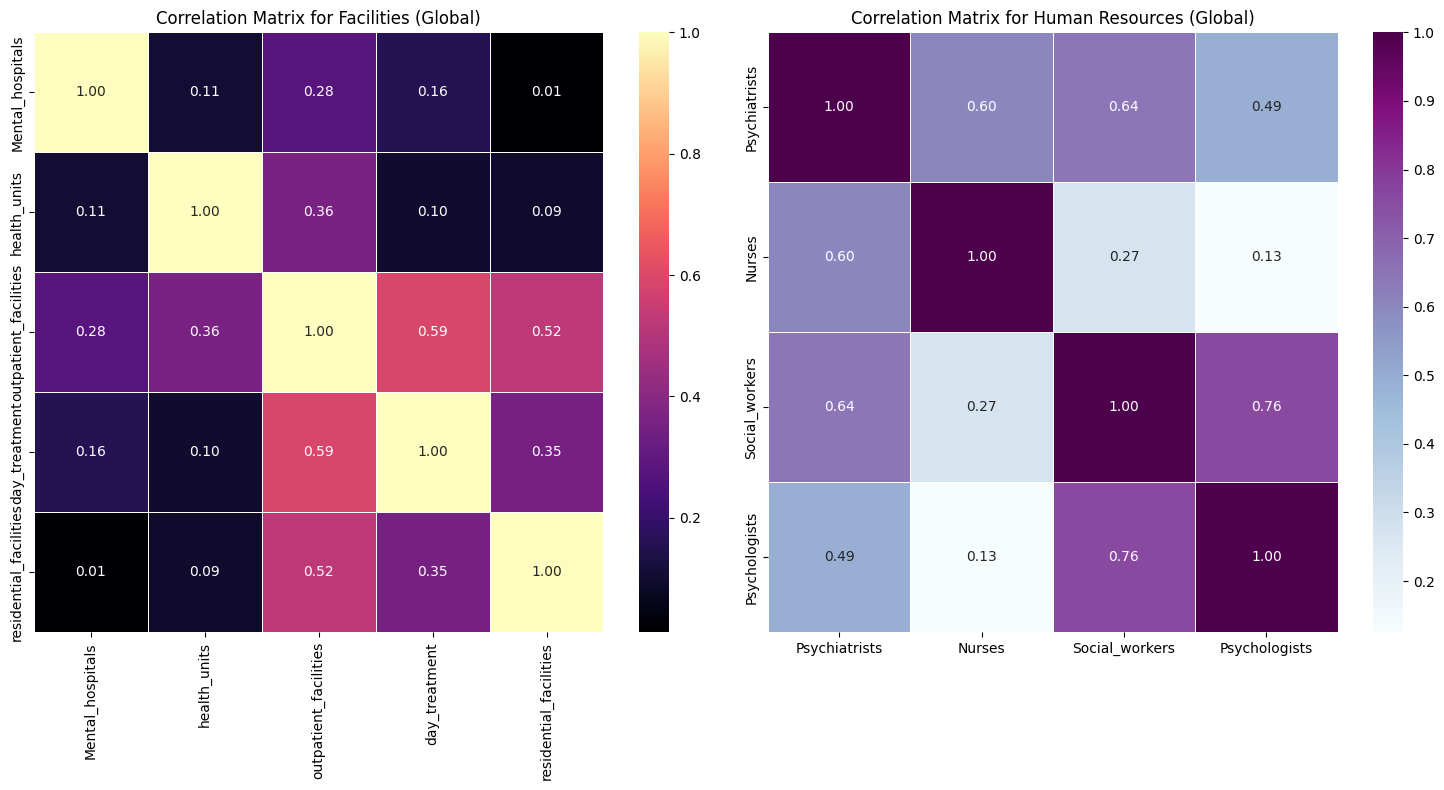

In [45]:
#Correlation matrix for facilities and human resources

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Loading the data
facilities_data = pd.read_csv('Facilities.csv')
human_resources_data = pd.read_csv('Human_Resources.csv')

# Selecting relevant columns for correlation analysis
numerical_columns_facilities = ['Mental_hospitals', 'health_units', 'outpatient_facilities', 'day_treatment', 'residential_facilities']
numerical_columns_human_resources = ['Psychiatrists', 'Nurses', 'Social_workers', 'Psychologists']

# Calculating correlation matrices
correlation_matrix_facilities = facilities_data[numerical_columns_facilities].corr()
correlation_matrix_human_resources = human_resources_data[numerical_columns_human_resources].corr()

# Creating subplots
plt.figure(figsize=(15, 8))

# Plotting Facilities Correlation Matrix
plt.subplot(1, 2, 1)
sns.heatmap(correlation_matrix_facilities, annot=True, cmap='magma', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix for Facilities (Global)')

# Plotting Human Resources Correlation Matrix
plt.subplot(1, 2, 2)
sns.heatmap(correlation_matrix_human_resources, annot=True, cmap='BuPu', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix for Human Resources (Global)')


plt.tight_layout()
plt.show()

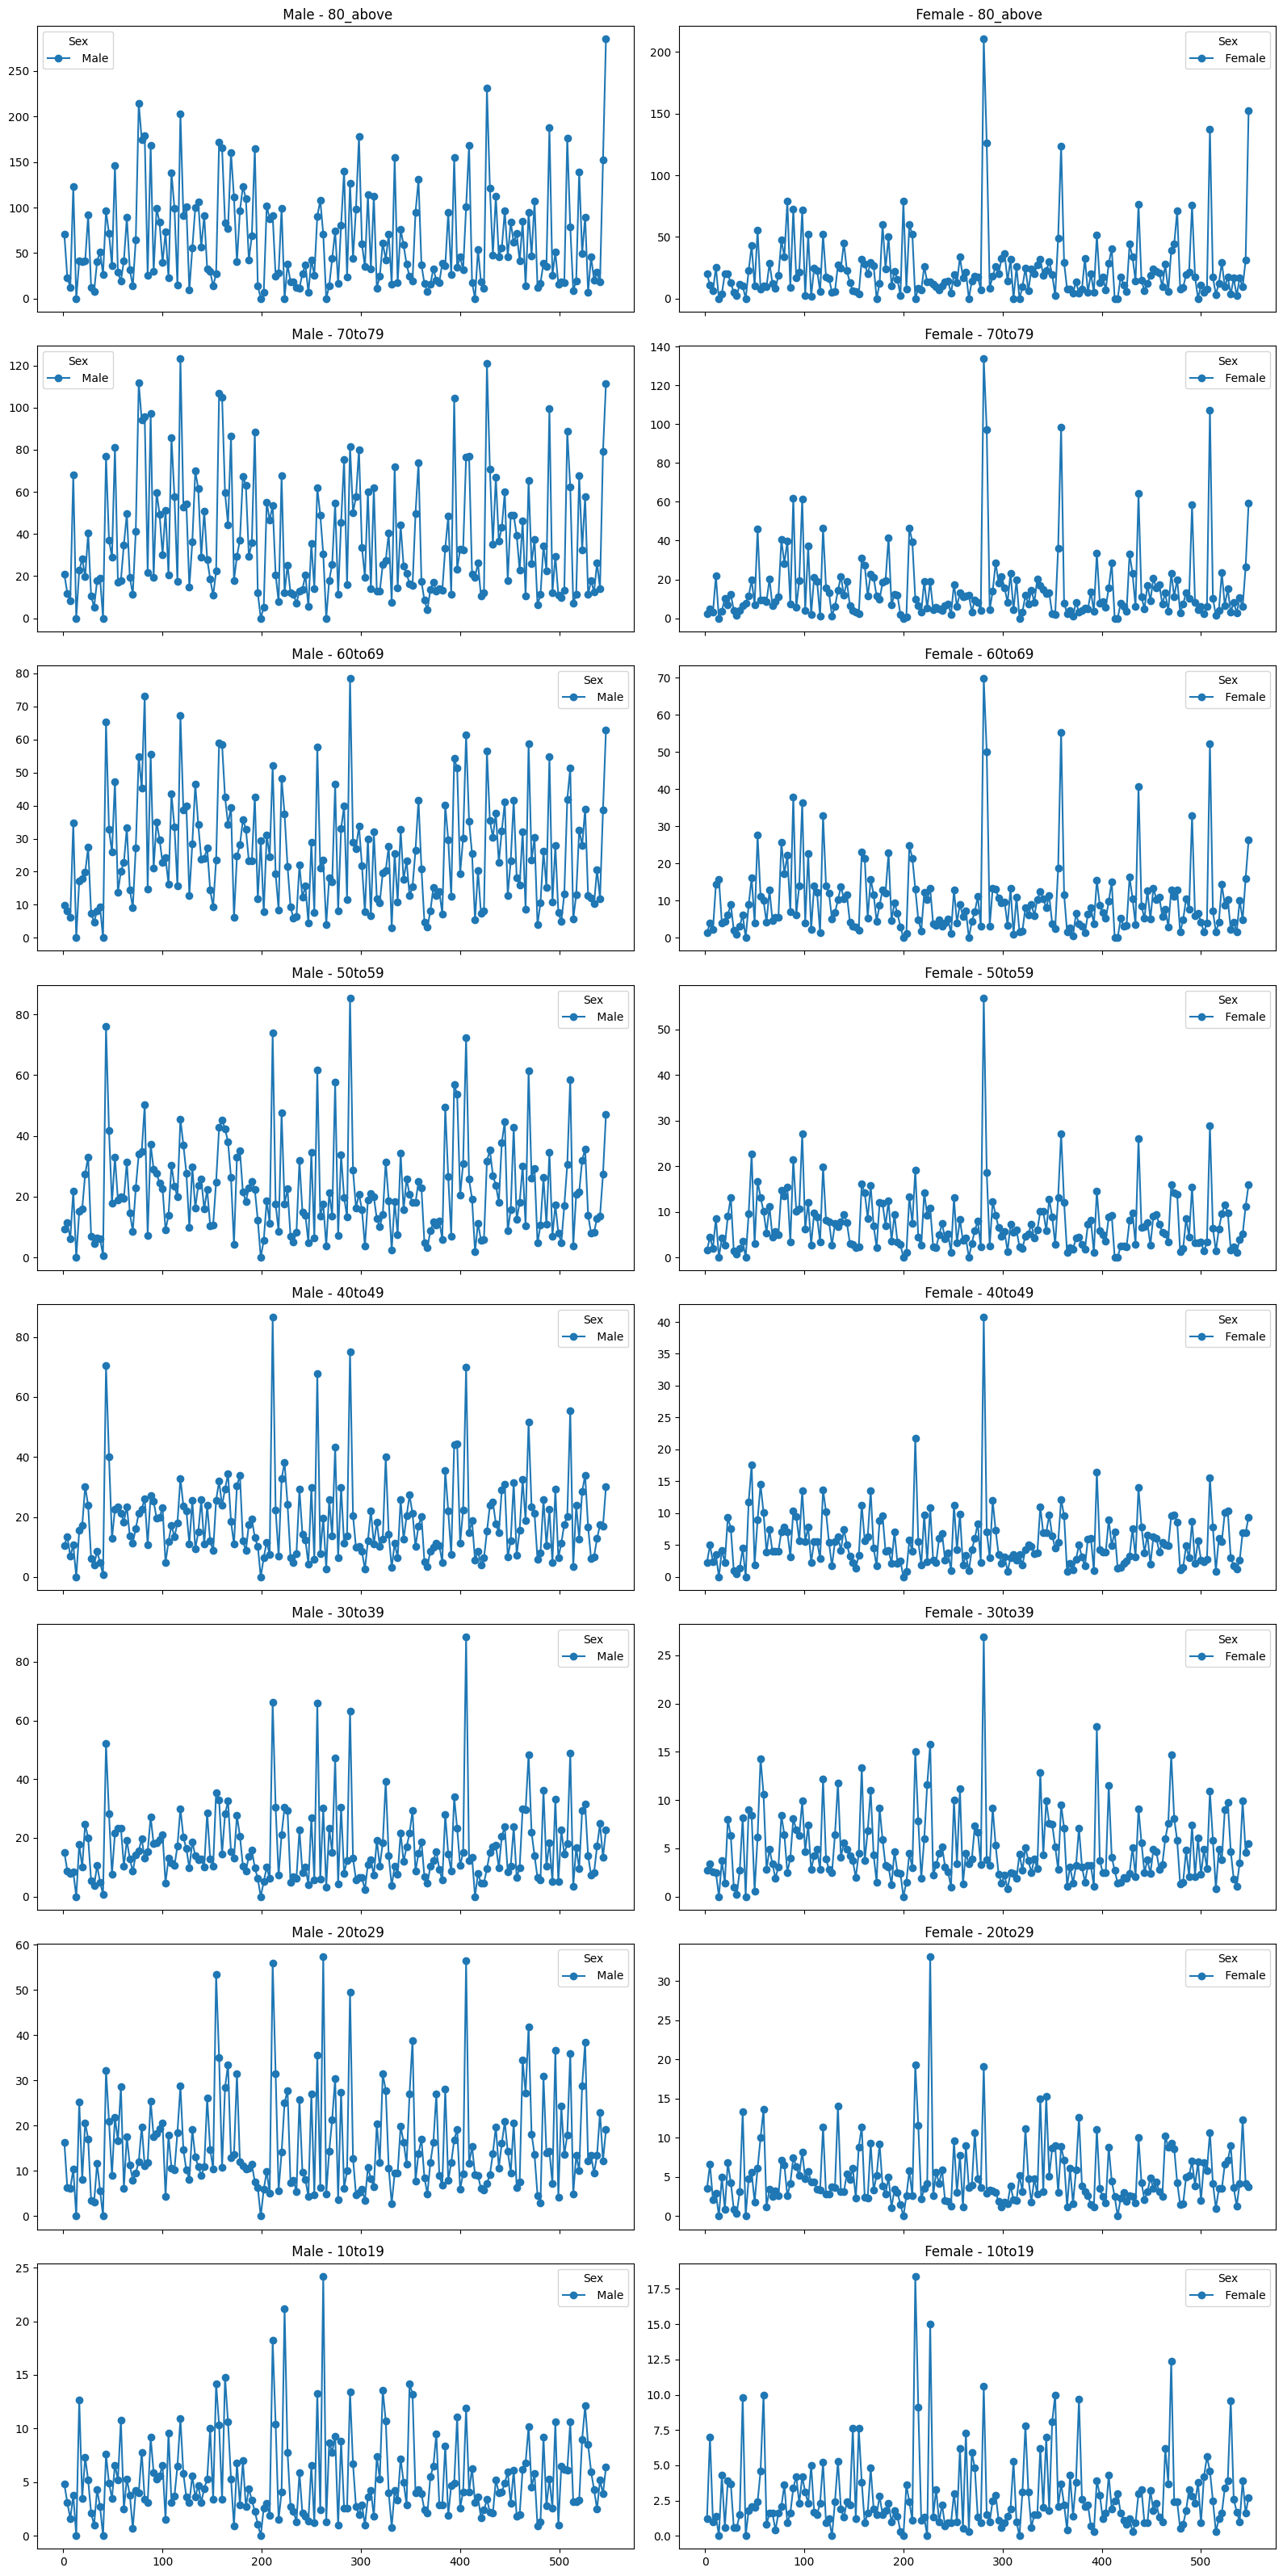

In [40]:
#Plotting Age-based Suicide Rates Using Line Charts

# Loading data
crude_suicide_data = pd.read_csv('Crude_suicide_rates.csv')

# Selecting relevant columns
age_groups = ['80_above', '70to79', '60to69', '50to59', '40to49', '30to39', '20to29', '10to19']
selected_sexes = [' Male', ' Female']

# Figure and axes
fig, axes = plt.subplots(nrows=len(age_groups), ncols=len(selected_sexes), figsize=(16, 4 * len(age_groups)), sharex=True)

# Plot lines for each age group and sex
for i, age_group in enumerate(age_groups):
    for j, sex in enumerate(selected_sexes):
        ax = axes[i,j]
        selected_data = crude_suicide_data[(crude_suicide_data['Sex'] == sex)]
        ax.plot(selected_data[age_group.strip()], label=sex, marker='o') 
        ax.set_title(f'{sex} - {age_group.strip()}')
        ax.legend(title='Sex')

plt.tight_layout()
plt.show()

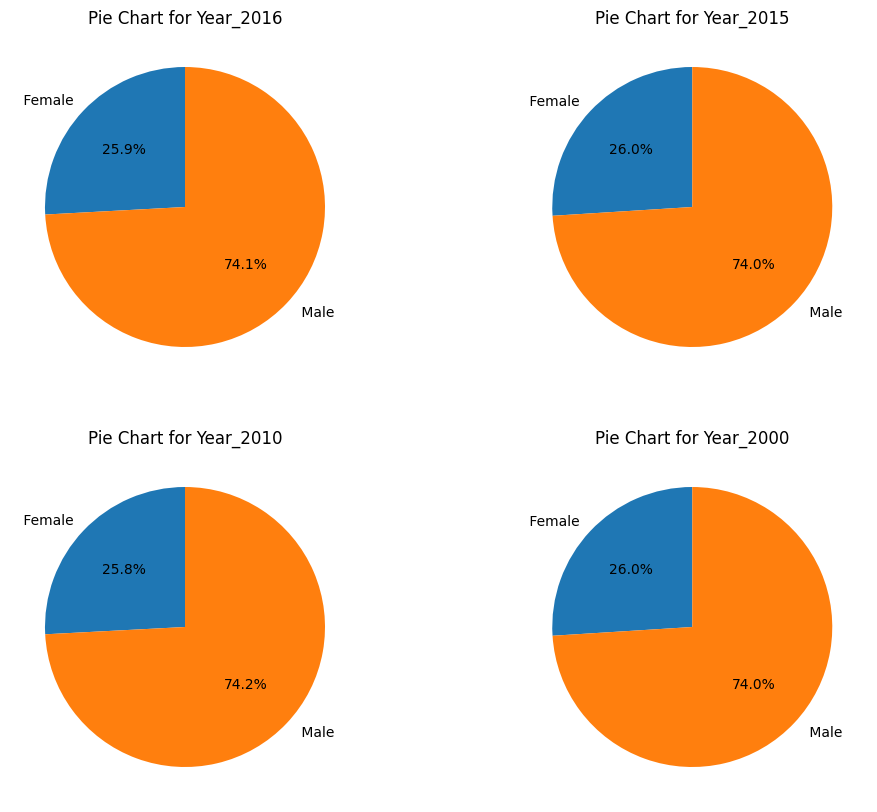

In [71]:
# Loading data
age_standardized_data = pd.read_csv('Age_standardized_suicide_rates.csv')

# Selecting the years
selected_years = ['Year_2016', 'Year_2015', 'Year_2010', 'Year_2000']

# Setting up subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Iterating through each year and creating a pie chart
for i, year in enumerate(selected_years):
    ax = axes[i // 2, i % 2]

    filtered_data = age_standardized_data[age_standardized_data['Sex'].isin([' Male', ' Female'])]
    selected_data = filtered_data[['Sex', year]].groupby('Sex').sum()

    # Create a pie chart
    ax.pie(selected_data[year], labels=selected_data.index, autopct='%1.1f%%', startangle=90)
    ax.set_title(f'Pie Chart for {year}')

# Explicitly show the figure
plt.show()


In [ ]:
#Closing the cursor
cursor.close()
connection.close()